In [37]:
import pandas as pd

import numpy as np

In [181]:
df = pd.read_parquet('src/eval_1.parquet')

In [182]:
df

,label,video_name,embeddings
0,7,354.mp4,"[0.020576216, 0.032058235, 0.006353401, 0.0156..."
1,0,385.mp4,"[0.018505577, 0.029559724, 0.01046238, 0.02506..."
2,5,35-30-1920x1080.mp4,"[0.024414863, 0.023449918, 0.007398856, 0.0105..."
3,5,9-15-1920x1080.mp4,"[0.038196467, 0.035862006, 0.019434832, 0.0264..."
4,0,video1.mp4,"[0.0036152618, 0.03415381, 0.015950188, 0.0095..."
...,...,...,...
10948,5,9-15-1920x1080.mp4,"[0.030204969, 0.008421314, 0.029740935, 0.0172..."
10949,0,112-30-640x360.mp4,"[0.018451812, 0.02479466, 0.023763169, 0.00869..."
10950,6,video73.mp4,"[0.035598535, 0.013850466, 0.014966671, 0.0092..."
10951,5,139-14-720x480.mp4,"[0.0340978, 0.026391778, 0.010984744, 0.008984..."


In [183]:
df['label'] = df['label'].astype(int)

In [184]:
df.groupby('label')['embeddings'].count().to_frame()

,embeddings
label,
0,2388
1,117
2,63
3,171
4,1497
5,4473
6,1340
7,904


In [185]:
df.groupby('video_name')['embeddings'].count().to_frame()

,embeddings
video_name,
112-30-640x360.mp4,492
13-30-1920x1080.mp4,738
139-14-720x480.mp4,960
25-25-600x480.mp4,454
27-60-1280x720.mp4,40
28-30-1280x720-1.mp4,26
35-30-1920x1080.mp4,973
354.mp4,396
365.mp4,71


In [186]:
classes = {'Neutral': 0, 'Anger': 1, 'Disgust': 2, 'Fear': 3, 'Happiness': 4, 'Sadness': 5, 'Surprise': 6, 'Other': 7}

In [187]:
classes_encoder = {value: key for key, value in classes.items()}

In [188]:
classes_encoder

{0: 'Neutral',
 1: 'Anger',
 2: 'Disgust',
 3: 'Fear',
 4: 'Happiness',
 5: 'Sadness',
 6: 'Surprise',
 7: 'Other'}

In [189]:
df['label'] = df['label'].replace(classes_encoder)

In [190]:
def compute_similarity(df: pd.DataFrame):
    a = np.array(df['embeddings'].to_list())
    result_matrix = a @ a.T
    
    out = np.ones(result_matrix.shape,dtype=bool)
    np.fill_diagonal(out,0)
    
    return result_matrix[out].mean()

In [191]:
metric_dict = dict()

for name, group in df.groupby('label'):
    metric_dict[name] = compute_similarity(group)

In [192]:
# class similarity
metric_dict

{'Anger': 0.95699054,
 'Disgust': 0.96529,
 'Fear': 0.9493797,
 'Happiness': 0.96109277,
 'Neutral': 0.95216036,
 'Other': 0.96349365,
 'Sadness': 0.9575271,
 'Surprise': 0.9607543}

In [193]:
metric_video_dict = dict()

for name, group in df.groupby('video_name'):
    metric_video_dict[name] = compute_similarity(group)

In [194]:
# video similarity
metric_video_dict

{'112-30-640x360.mp4': 0.9534933,
 '13-30-1920x1080.mp4': 0.9709721,
 '139-14-720x480.mp4': 0.96161234,
 '25-25-600x480.mp4': 0.9682048,
 '27-60-1280x720.mp4': 0.98294723,
 '28-30-1280x720-1.mp4': 0.97934383,
 '35-30-1920x1080.mp4': 0.97858137,
 '354.mp4': 0.9802353,
 '365.mp4': 0.97840935,
 '369.mp4': 0.9880617,
 '381.mp4': 0.97164476,
 '384.mp4': 0.9702228,
 '385.mp4': 0.9888756,
 '387.mp4': 0.9775568,
 '388.mp4': 0.9663158,
 '429.mp4': 0.9819485,
 '439.mp4': 0.9778514,
 '447.mp4': 0.97611606,
 '57-25-426x240.mp4': 0.9935759,
 '87-25-1920x1080.mp4': 0.98089355,
 '9-15-1920x1080.mp4': 0.9557695,
 'video1.mp4': 0.9585357,
 'video2.mp4': 0.9645333,
 'video34.mp4': 0.96703285,
 'video73.mp4': 0.97197574}

In [195]:
# whole similarity
compute_similarity(df)

0.9548542

In [196]:
df[df['label']=='Anger']['video_name'].value_counts()

video_name
9-15-1920x1080.mp4      63
28-30-1280x720-1.mp4    25
video73.mp4             17
369.mp4                 10
video34.mp4              1
365.mp4                  1
Name: count, dtype: int64

In [197]:
neutral = df[(df['label']=='Happiness')]['embeddings'].to_list()

In [198]:
anger = df[(df['label']=='Sadness')]['embeddings'].to_list()

In [199]:
#similarity between opposite emotions (neutral and anger)
negative_score = (np.array(neutral) @ np.array(anger).T).reshape(len(neutral) * len(anger))

In [200]:
def compute_similarity_vector(df: pd.DataFrame):
    a = np.array(df['embeddings'].to_list())
    result_matrix = a @ a.T
    
    out = np.ones(result_matrix.shape,dtype=bool)
    np.fill_diagonal(out,0)
    
    return result_matrix[out]

In [201]:
positive_score = compute_similarity_vector(df[(df['label']=='Happiness')])

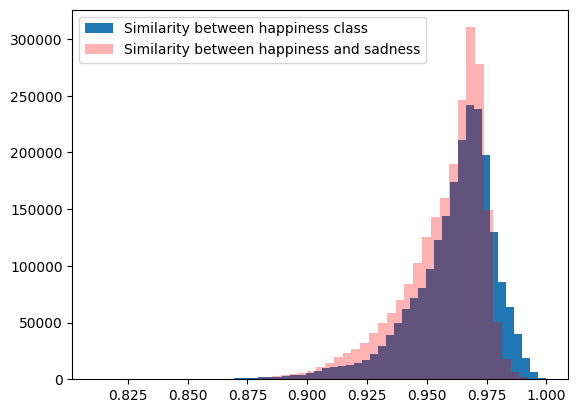

In [202]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.hist(positive_score[:len(negative_score)], label='Similarity between happiness class', bins=50)
_ = ax.hist(negative_score[:len(positive_score)], color='red', alpha=.3, label='Similarity between happiness and sadness', bins=50)

ax.legend()

<AxesSubplot: >

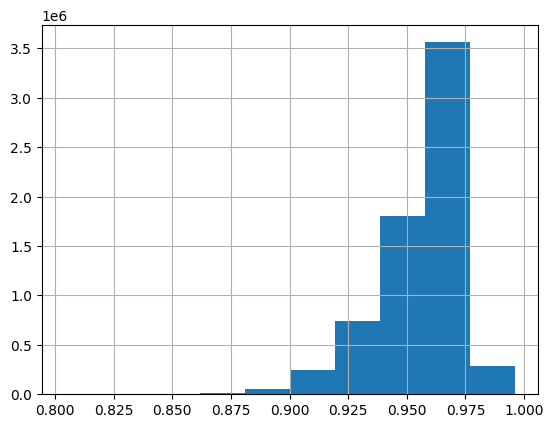

In [203]:
pd.Series(negative_score).hist()

<AxesSubplot: >

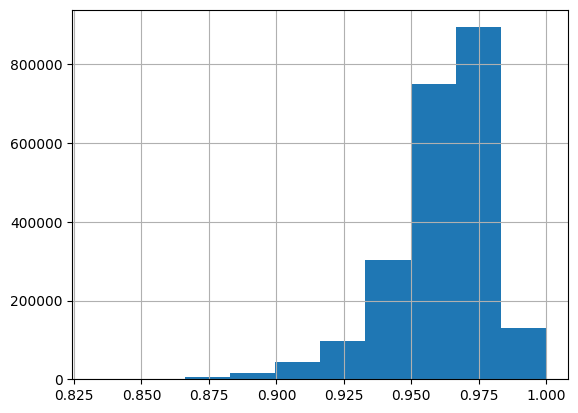

In [204]:
pd.Series(positive_score).hist()

In [205]:
df

,label,video_name,embeddings
0,Other,354.mp4,"[0.020576216, 0.032058235, 0.006353401, 0.0156..."
1,Neutral,385.mp4,"[0.018505577, 0.029559724, 0.01046238, 0.02506..."
2,Sadness,35-30-1920x1080.mp4,"[0.024414863, 0.023449918, 0.007398856, 0.0105..."
3,Sadness,9-15-1920x1080.mp4,"[0.038196467, 0.035862006, 0.019434832, 0.0264..."
4,Neutral,video1.mp4,"[0.0036152618, 0.03415381, 0.015950188, 0.0095..."
...,...,...,...
10948,Sadness,9-15-1920x1080.mp4,"[0.030204969, 0.008421314, 0.029740935, 0.0172..."
10949,Neutral,112-30-640x360.mp4,"[0.018451812, 0.02479466, 0.023763169, 0.00869..."
10950,Surprise,video73.mp4,"[0.035598535, 0.013850466, 0.014966671, 0.0092..."
10951,Sadness,139-14-720x480.mp4,"[0.0340978, 0.026391778, 0.010984744, 0.008984..."


In [132]:
# happines and sadness
df.iloc[-1]['embeddings'] @ df.iloc[-2]['embeddings'].T

0.9428461